Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE"

Do not edit or insert code into the test cells as all you insert will be overwritten by the automated testing code.

---

**Question 10**: Use the Verlet method (see script, section 5.3.1, from page 79) to calculate the orbit of the Earth around the Sun. The equations of motion for the position $r=(x,y)$ of the planet in its orbital plane are: $$\frac{d^{2}x(t)}{dt^{2}}=-G\,M\,\frac{x}{r^{3}},\;\frac{d^{2}y(t)}{dt^{2}}=-G\,M\,\frac{y}{r^{3}},$$ where $r=\sqrt{x^{2}+y^{2}}$.

**Task**: Calculate the orbit of the Earth around the Sun in steps of one hour for a total period of four years. Use the solution for the orbit, $r(t)$, and the velocity, $v(t)$, to calculate additionally the potential and kinetic energy of Earth at each evaluation point. Create a function `potentialEnergy(r,par)` and a function `kineticEnergy(v,par)` which implement these requested calculations separately from solving the ODE's and can be called from tests. Also create a function `solve(par)` which returns the value arrays for $r(t)$ and $v(t)$ as a tuple such that the tests can call `solve(par)` and obtain the results. Note that the potential energy depends only on the Earth location, $r(t)$, and its kinetic energy only on its velocity, $v(t)$. The variable `par` should be a tuple containing the required constant values in order `(G,M,m)`, see Data below.

**Data**: Use $G=6.6738\times{}10^{-11}$ m$^{3}$kg$^{-1}$s$^{-2}$ as Newton's gravitational constant, $M=1.9891\times{}10^{30}$ kg as mass of the Sun. For Earth mass, use $m=5.9722\times{}10^{24}$ kg. The initial conditions should be $r_{0}=(1.521\times{}10^{11},0)$ m and $v_{0}=(0,2.9291\times{}10^{4})$ ms$^{-1}$. Time evaluation points are in the task description and note that you work in SI units.

Create two plots: **(a)** draw the kinetic energy, potential energy and total energy, superimposed on a single canvas and observe how the kinetic and potential energies change as a function of time while the total energy appears to be constant.

**(b)** Plot only the total energy as a function of time and observe the oscillating character while the mean remains constant to high precision which demonstrates the inherent energy conservation of the Verlet method.

**Note**: you may wish to solve the problem using `solve_ivp()` but that is not recommended. It is entirely possible and possibly illuminating in comparison(!) to the Verlet method but effectively similar effort for worse results. The tests are likely to fail and deduct marks for this case.

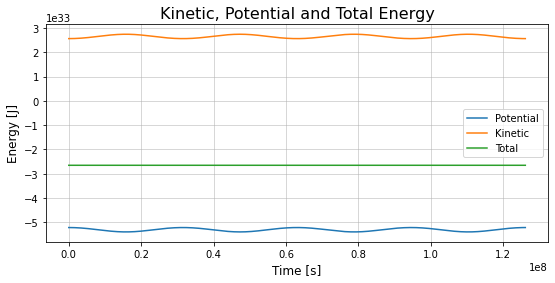

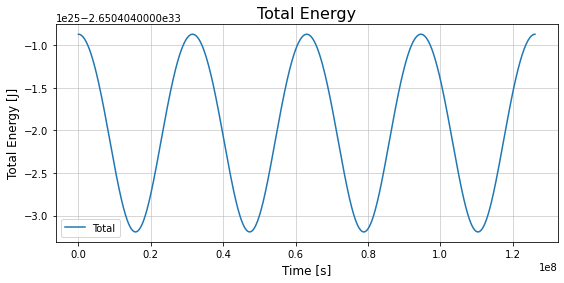

In [1]:
# YOUR CODE HERE
import numpy as np
import matplotlib.pyplot as plt

G = 6.6738e-11 # Gravitational constant [m^3 kg^-1 s^-2]
M = 1.9891e30 # Sun's mass [kg]
m = 5.9722e24 # Earth's mass [kg]
par = (G, M, m)

def accelFunc(pos):
    '''
    Parameters
    ----------
    pos : position
    Returns
    -------
    retVal : acceleration
    '''
    rad = np.linalg.norm(pos)
    retVal = - G * M * pos / (rad ** 3)
    return retVal

def potentialEnergy(r, par):
    '''
    Parameters
    ----------
    r : radius array
    par : parameters for G, M, and m
    Returns
    -------
    retVal : potential energy value
    '''
    G, M, m = par
    N = r.shape[0]
    retVal = np.zeros(N)
    for i in range(N):
        rad = np.linalg.norm(r[i])
        retVal[i] = - G * M * m / rad
    return retVal

def kineticEnergy(v, par):
    '''
    Parameters
    ----------
    v : velocity array
    par : parameters for G, M, and m
    Returns
    -------
    retVal : kinetic energy value
    '''
    m = par[2]
    N = v.shape[0]
    retVal = np.zeros(N)
    for i in range(N):
        vel = np.linalg.norm(v[i])
        retVal[i] = 0.5 * m * (vel ** 2)
    return retVal

nTotal = 24*365*4*3600 # total time [s]
r0 = (1.521e11, 0) # [m]
v0 = (0, 2.9291e4) # [ms^-1]
dt = 3600 # timestep
N = nTotal // dt


def solve(par):
    '''
    Parameters
    ----------
    par : parameters for G, M, and m
    Returns
    -------
    rt : radius array
    vt : velocity array
    '''
    # set up inital parameters and position
    G, M, m = par
    rt = np.zeros((N, 2))
    vt = np.zeros((N, 2))
    t = np.zeros(N)
    rt[0,:] = r0
    vt[0,:] = v0

    # starting v(0 + 0.5dt)
    vhalf = v0 + 0.5 * dt * accelFunc(rt[0])

    # looping over n steps
    for i in range(N - 1):

        rt[i+1] = rt[i] + vhalf * dt
        k = dt * accelFunc(rt[i+1])
        vt[i+1] = vhalf + 0.5 * k
        vhalf += k

    return rt, vt

# (a) Plot graph with KE, PE, and Total
rt, vt = solve(par)
time = np.linspace(0, nTotal - 1, N)
PE = potentialEnergy(rt, par)
KE = kineticEnergy(vt, par)
totE = PE + KE

plt.figure(figsize = (9, 4))
plt.title("Kinetic, Potential and Total Energy", fontsize = 16)
plt.plot(time, PE, label = "Potential")
plt.plot(time, KE, label = "Kinetic")
plt.plot(time, totE, label = "Total")
plt.xlabel("Time [s]", fontsize = 12)
plt.ylabel("Energy [J]", fontsize = 12)
plt.legend()
plt.grid(linewidth = 0.5)
plt.show()

# (b) Plot graph with total energy
plt.figure(figsize = (9, 4))
plt.title("Total Energy", fontsize = 16)
plt.plot(time, totE, label = "Total")
plt.xlabel("Time [s]", fontsize = 12)
plt.ylabel("Total Energy [J]", fontsize = 12)
plt.legend()
plt.grid(linewidth = 0.5)
plt.show()


In [2]:
# Test
a = 6.6738e-11 # Gravitational constant
b = 1.9891e30 # [kg]
c = 5.9722e24 # [kg]
p = (a,b,c)
rv,vv = solve(p)
assert (rv.shape[0]==4*365*24 and vv.shape[0]==rv.shape[0]), 'wrong number of evaluation points'

In [3]:
# Test cell
Pe = potentialEnergy(rv, p)
Ke = kineticEnergy(vv, p)
total = Pe + Ke
assert (abs(1.0-np.max(total)/np.mean(total))<1e-8), 'wrong total energy precision'

### Tests 2 marks; Style 1 mark; Plots - 2 marks